## **Prueba técnica Data Science**

#### Max Benjamín Austria Salazar

### **0. Descarga del archivo desde Kaggle**

Paquetes

In [25]:
from google.colab import drive
from google.colab import files
import pandas as pd
import zipfile

Monte sus archivos de Google Drive

In [26]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Carge su token de Kaggle.

In [27]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"arkoncandidato","key":"9418335fb96960d7242aebcd1a24dd55"}'}

Asegurrese que cargo su archivo kaggle.json

In [28]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Oct  7 21:26 kaggle.json


Instale la API de Kaggle.

In [29]:
 #!pip install -q kaggle

La API de kaggle espera que el archivo esté en ~/.kaggle. Así que muevalo.

In [30]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Configure los permisos

In [31]:
!chmod 600 /root/.kaggle/kaggle.json

Verifique su directorio.

In [32]:
!pwd

/content


Lista de datos disponibles.

In [33]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13913        393  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1855         41  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           1240         36  1.0              
pantanjali/unemployment-dataset                                Un

Descarge el archivo de prueba.

In [34]:
! kaggle competitions download -c ds-programming-test

 48% 17.0M/35.5M [00:00<00:00, 24.9MB/s]
100% 35.5M/35.5M [00:00<00:00, 46.6MB/s]


Descomprima el archivo

In [35]:
!unzip ds-programming-test.zip

Archive:  ds-programming-test.zip
  inflating: sample_submission.csv   
  inflating: test_set.csv            
  inflating: train_set.csv           


In [36]:
test = pd.read_csv("/content/test_set.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
train = pd.read_csv("/content/train_set.csv")

In [38]:
muestra = pd.read_csv("/content/sample_submission.csv")

### **1. Exploratorio de datos**

Para comenzar la asignación se requiere realizar un análisis
exploratorio de datos que busque contestar preguntas relevantes a los siguientes dos temas:

**1. 1 Saturación del servicio:**

La empresa busca contar con la disponibilidad más alta
de servicio en el mercado, por lo que se quiere entender cómo se comporta la demanda de servicio en las distintas estaciones y horarios para cada plan.

Paquetes:

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

Listas de campos:

In [40]:
test.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'trip_route_category',
       'start_station', 'end_station'],
      dtype='object')

In [41]:
train.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration',
       'trip_route_category', 'passholder_type', 'start_station',
       'end_station'],
      dtype='object')

In [42]:
muestra.columns

Index(['trip_id', 'passholder_type'], dtype='object')

Lista de planes:

In [43]:
train.passholder_type.drop_duplicates()

0            Walk-up
2       Monthly Pass
3       One Day Pass
24       Annual Pass
85         Flex Pass
116              NaN
1652         Testing
Name: passholder_type, dtype: object

- El sistema cuenta con 364 estaciones diferentes.

In [44]:
train.start_station.drop_duplicates()

0         4127
1         3057
2         3022
3         4304
4         4266
          ... 
136557    4395
157146    4363
252719    4373
501744    4143
502217    4327
Name: start_station, Length: 364, dtype: int64

- Sólo hay dos tipos de viaje: Unidirecciones e Ida y vuelta.

In [45]:
train.trip_route_category.drop_duplicates()

0    Round Trip
1       One Way
Name: trip_route_category, dtype: object

- Las estaciones que son mucho más usadas son las que comienzan con 30, 31 y  42.

- Los viajes unidireccionales son los más populares.

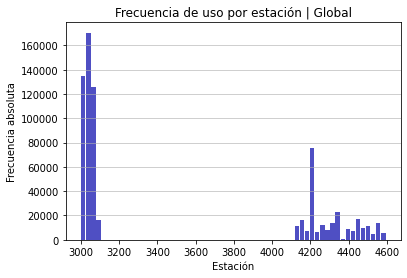

In [46]:
n, bins, patches = plt.hist(x=train.start_station, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | Global')
maxfreq = n.max()

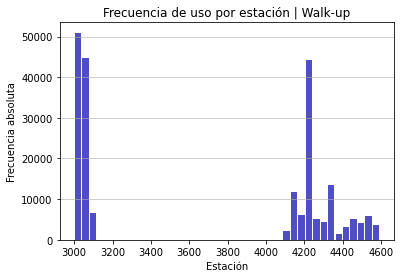

In [47]:
estaciones = train.loc[train['passholder_type']=='Walk-up'].start_station
n, bins, patches = plt.hist(x=estaciones, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | Walk-up')
maxfreq = n.max()

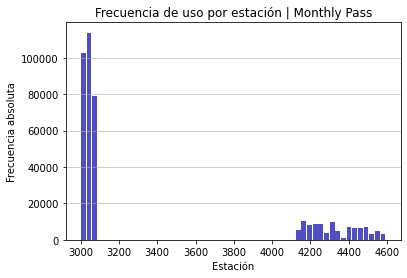

In [48]:
estaciones = train.loc[train['passholder_type']=='Monthly Pass'].start_station
n, bins, patches = plt.hist(x=estaciones, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | Monthly Pass')
maxfreq = n.max()

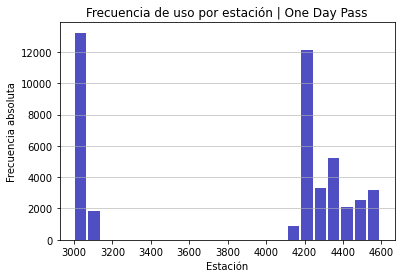

In [49]:
estaciones = train.loc[train['passholder_type']=='One Day Pass'].start_station
n, bins, patches = plt.hist(x=estaciones, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | One Day Pass')
maxfreq = n.max()

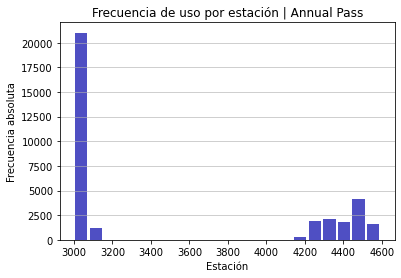

In [50]:
estaciones = train.loc[train['passholder_type']=='Annual Pass'].start_station
n, bins, patches = plt.hist(x=estaciones, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | Annual Pass')
maxfreq = n.max()

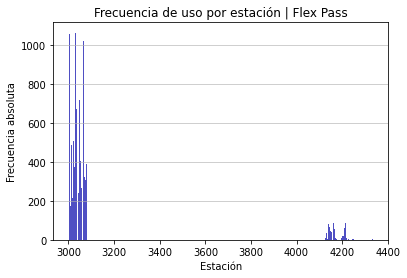

In [51]:
estaciones = train.loc[train['passholder_type']=='Flex Pass'].start_station
n, bins, patches = plt.hist(x=estaciones, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estación')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por estación | Flex Pass')
maxfreq = n.max()

- La mayoria de los viajes entre las 8 y 20 horas, siendo la hora pico las 17 hrs.

- La demanda de los viajes de ida y vuelta se mantiene aproximadamente constante entre las 12 y 17 horas, mientras que los viajes unidireccionales no se mantienen estables.

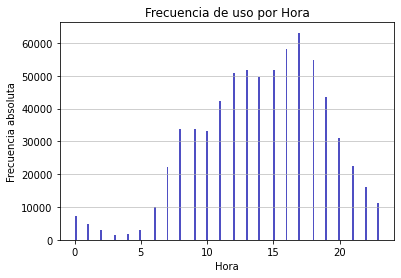

In [52]:
hora = [pd.to_datetime(x).hour for x in train.start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora')
maxfreq = n.max()

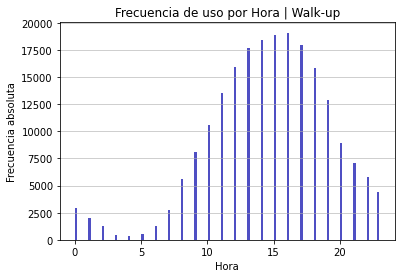

In [53]:
hora = [pd.to_datetime(x).hour for x in train.loc[train['passholder_type']=='Walk-up'].start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora | Walk-up')
maxfreq = n.max()

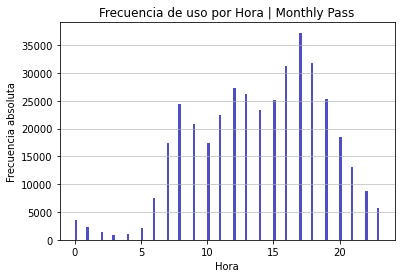

In [54]:
hora = [pd.to_datetime(x).hour for x in train.loc[train['passholder_type'] == 'Monthly Pass'].start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora | Monthly Pass')
maxfreq = n.max()

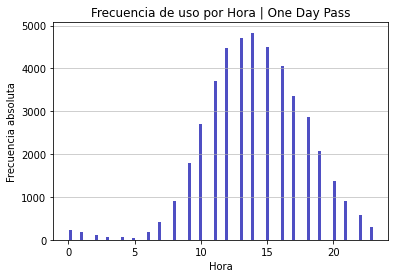

In [55]:
hora = [pd.to_datetime(x).hour for x in train.loc[train['passholder_type'] == 'One Day Pass'].start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora | One Day Pass')
maxfreq = n.max()

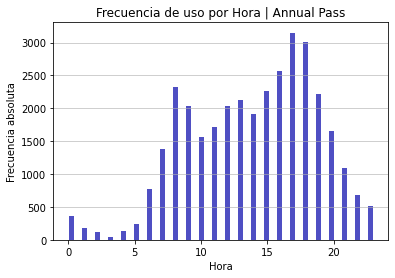

In [56]:
hora = [pd.to_datetime(x).hour for x in train.loc[train['passholder_type'] == 'Annual Pass'].start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora | Annual Pass')
maxfreq = n.max()

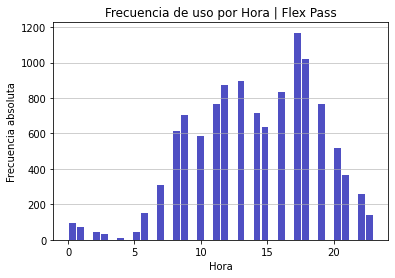

In [57]:
hora = [pd.to_datetime(x).hour for x in train.loc[train['passholder_type'] == 'Flex Pass'].start_time] 
n, bins, patches = plt.hist(x=hora , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hora')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Hora | Flex Pass')
maxfreq = n.max()

**1. 2. Crecimiento de planes:**

Se tiene la intuición que la tendencia en uso de bicicletas compartidas entre estaciones va a la alta, por lo que se requiere realizar una correcta planificación de bicicletas que deben tener. Adicionalmente, se espera que los planes de consumo anual crezcan en mayor
proporción.

- La pandemia afecto negativamente al número de viajes.
- El único paquete con una tendencia creciente de uso es *One Day Pass*.

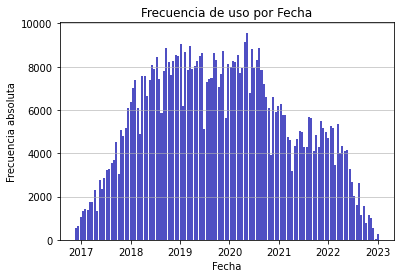

In [58]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha')
maxfreq = n.max()

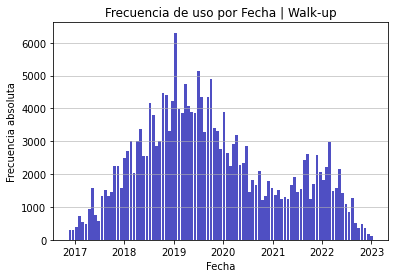

In [59]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.loc[train['passholder_type']=='Walk-up'].start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | Walk-up')
maxfreq = n.max()

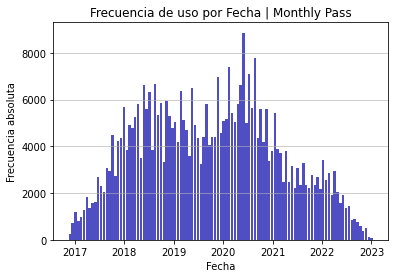

In [60]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.loc[train['passholder_type']=='Monthly Pass'].start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | Monthly Pass')
maxfreq = n.max()

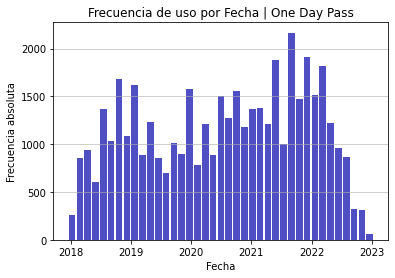

In [61]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.loc[train['passholder_type']=='One Day Pass'].start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | One Day Pass')
maxfreq = n.max()

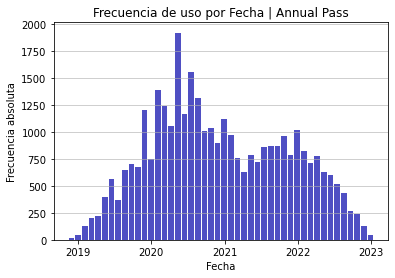

In [62]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.loc[train['passholder_type']=='Annual Pass'].start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | Annual Pass')
maxfreq = n.max()

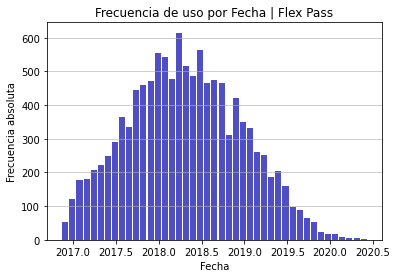

In [63]:
dia = [pd.to_datetime(x).year + pd.to_datetime(x).month/12 +pd.to_datetime(x).day/30 for x in train.loc[train['passholder_type']=='Flex Pass'].start_time]
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | Flex Pass')
maxfreq = n.max()

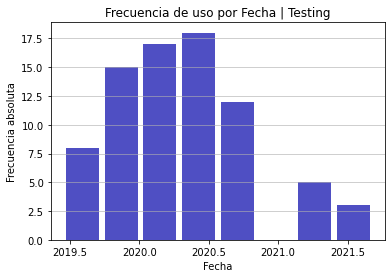

In [64]:
dia = 
n, bins, patches = plt.hist(x=dia , bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia de uso por Fecha | Testing')
maxfreq = n.max()

### **2. Modelo analítico**

Se desea saber si es posible inferir el tipo de pase tomando en
cuenta las demás variables de viaje.

- Construya un modelo analítico que incluya los puntos indispensables a considerar para un modelo (feature engineering, diseño de train-test split, cross-validation, métricas de desempeño, entre otros).

- Interprete el resultado en contexto del problema y determine qué variables impactan en la predicción.

- Tomando en cuenta los exploratorios y el modelo analítico, ¿cree que es un buen modelo? ¿Qué variables adicionales añadiría para mejorar el modelo?

In [65]:
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Construyendo los datos de entrenamiento y prueba.

In [75]:
train.shape

(700000, 14)

In [99]:
np.random.seed(1)
muestra = sample(range(0,700000), 500000)

In [100]:
XTrain = train.iloc[muestra]
XTest = train[~train.index.isin(muestra)]

In [101]:
Walkup = [int(x) for x in (train['passholder_type'] == 'Walk-up')]
Monthly = [int(x) for x in (train['passholder_type'] == 'Monthly Pass')]
OneDay = [int(x) for x in (train['passholder_type'] == 'One Day Pass')]
Annual = [int(x) for x in (train['passholder_type'] == 'Annual Pass')]
Flex = [int(x) for x in (train['passholder_type'] == 'Flex Pass')]

In [102]:
d = {'Walkup':Walkup, 'Monthly': Monthly, 'OneDay':OneDay, 'Annual':Annual, 'Flex':Flex}

In [103]:
Y = pd.concat([pd.Series(v, name = k) for k, v in d.items()], axis = 1)

YTrain = Y.iloc[muestra]
YTest = Y[~train.index.isin(muestra)]

In [104]:
from keras.utils import np_utils

In [96]:
numclases = 5

In [98]:
YTrain = np_utils.to_categorical(YTrain, numclases)
YTest = np_utils.to_categorical(YTest, numclases)

### **3. Evaluación del modelo**

Se desea saber si es posible inferir el tipo de pase tomando en
cuenta las demás variables de viaje.

- Construya un modelo analítico que incluya los puntos indispensables a considerar para un modelo (feature engineering, diseño de train-test split, cross-validation, métricas de desempeño, entre otros).

- Interprete el resultado en contexto del problema y determine qué variables impactan en la predicción.

- Tomando en cuenta los exploratorios y el modelo analítico, ¿cree que es un buen modelo? ¿Qué variables adicionales añadiría para mejorar el modelo?

### **4. Diagrama del Flujo**

Por último, se desea poner en producción el modelo. Agregue un diagrama del flujo completo incluyendo la puesta en producción. Si tiene experiencia con servicios de
nube puede incluirlo.